In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab06.ipynb")

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display, Latex, Markdown
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
%matplotlib inline

import geopandas
import pycountry
import geopy

import re

# Lab 6: Geospatial Visualizations

In this lab, you will generate a 3D map visualizing data from [this paper](https://gabriel-zucman.eu/who-owns-offshore-real-estate/). The paper looks at the ownership of offshore real estate in Dubai (where Rohan grew up).  We would like to thank Professor Zucman for making his data freely available and accessible. Professor Zucman is one of the foremost experts in economic inequality; take [Econ 133](https://gabriel-zucman.eu/econ133/) to learn about it from him!

In order to generate the map, we will first import a cleaned version of the dataset from the paper. Then, we will do some essential data cleaning steps so the data can be interpreted by plotting packages. Then, we will generate a sample plot. Finally, we will use widgets to easily toggle between multiple plots.

### Learning Objectives:
- Revisits some data cleaning techniques
- Generates geospatial visualizations in 2D and 3D

First, let's load in the dataset.

In [3]:
data = pd.read_csv('APZO2022Data-cleaned.csv')
data.head()

Country  Unique Owners  Unique Properties Total Property Values  \
0           World    273871.0000           883268.0   USD 532,564,964,318   
1     Afghanistan      1134.0000             3220.0     USD 1,410,029,024   
2         Albania        17.0000               19.0         USD 6,762,555   
3         Algeria       790.0000             1539.0       USD 450,011,530   
4  American Samoa         4.9998                9.0        USD 10,082,724   

   GDP (current USD, 2018 or latest available - for coverage)  \
0                                       8.630000e+13            
1                                       1.810000e+10            
2                                       1.520000e+10            
3                                       1.750000e+11            
4                                       6.390000e+08            

  Total Property Value / GDP Mean Property value Median Property Value  \
0                      0.62%         USD 603,015           USD 212,081   
1                      7.81%         USD 437,897           USD 252,006   
2                      0.04%         USD 355,924           USD 325,745   
3                      0.26%         USD 292,405           USD 196,108   
4                      1.58%       USD 1,120,303           USD 844,572   

   Number of firms  Mean Age  ...  Properties in Dubai Marina  \
0           8017.0      49.7  ...                  41685.0000   
1              0.0      45.4  ...                     98.0000   
2              0.0      40.4  ...                      4.9998   
3              0.0      48.8  ...                    173.0000   
4              0.0      57.5  ...                      0.0000   

   Properties in Palm Jumeirah  Number of villas  Number of buildings  \
0                   17186.0000        58913.0000               4114.0   
1                     199.0000          352.0000                 16.0   
2                       4.9998            4.9998                  0.0   
3                      27.0000          131.0000                  0.0   
4                       0.0000            0.0000                  0.0   

  Share of total values owned by top 10% owners  \
0                                           80%   
1                                           66%   
2                                           79%   
3                                           54%   
4                                           93%   

   Share of total values owned by top 10% persons  \
0                                             26%   
1                                             66%   
2                                             79%   
3                                             54%   
4                                             93%   

   Share of total values owned by top 10% firms  \
0                                           51%   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   

   Share of total values owned by top 1% owners  \
0                                           63%   
1                                           38%   
2                                           56%   
3                                           25%   
4                                           93%   

   Share of total values owned by top 1% persons  \
0                                            13%   
1                                            38%   
2                                            56%   
3                                            25%   
4                                            93%   

   Share of total values owned by top 1% firms  
0                                          38%  
1                                          NaN  
2                                          NaN  
3                                          NaN  
4                                          NaN  

[5 rows x 27 columns]

---
## Part 1: Cleaning Data

In this part, you will follow the steps for cleaning the data as described in each individual subpart. If you do not follow the steps exactly, the plots will not be generated in subsequent parts.

**Question 1.1:** Set the `Country` column as the table index and delete the first row (the one for the entire World) from the data.

In [4]:
data = data.set_index('Country') # set index
data = data.iloc[1:] # delete the first row
data.head()

Unique Owners  Unique Properties Total Property Values  \
Country                                                                  
Afghanistan         1134.0000          3220.0000     USD 1,410,029,024   
Albania               17.0000            19.0000         USD 6,762,555   
Algeria              790.0000          1539.0000       USD 450,011,530   
American Samoa         4.9998             9.0000        USD 10,082,724   
Andorra                4.9998             4.9998           USD 243,222   

                GDP (current USD, 2018 or latest available - for coverage)  \
Country                                                                      
Afghanistan                                          1.810000e+10            
Albania                                              1.520000e+10            
Algeria                                              1.750000e+11            
American Samoa                                       6.390000e+08            
Andorra                                              3.220000e+09            

               Total Property Value / GDP Mean Property value  \
Country                                                         
Afghanistan                         7.81%         USD 437,897   
Albania                             0.04%         USD 355,924   
Algeria                             0.26%         USD 292,405   
American Samoa                      1.58%       USD 1,120,303   
Andorra                             0.01%                 NaN   

               Median Property Value  Number of firms  Mean Age  \
Country                                                           
Afghanistan              USD 252,006              0.0      45.4   
Albania                  USD 325,745              0.0      40.4   
Algeria                  USD 196,108              0.0      48.8   
American Samoa           USD 844,572              0.0      57.5   
Andorra                          NaN              0.0      54.0   

                Number with age variable  ...  Properties in Dubai Marina  \
Country                                   ...                               
Afghanistan                    1123.0000  ...                     98.0000   
Albania                          16.0000  ...                      4.9998   
Algeria                         787.0000  ...                    173.0000   
American Samoa                    4.9998  ...                      0.0000   
Andorra                           4.9998  ...                      4.9998   

                Properties in Palm Jumeirah  Number of villas  \
Country                                                         
Afghanistan                        199.0000          352.0000   
Albania                              4.9998            4.9998   
Algeria                             27.0000          131.0000   
American Samoa                       0.0000            0.0000   
Andorra                              0.0000            0.0000   

               Number of buildings  \
Country                              
Afghanistan                   16.0   
Albania                        0.0   
Algeria                        0.0   
American Samoa                 0.0   
Andorra                        0.0   

                Share of total values owned by top 10% owners  \
Country                                                         
Afghanistan                                               66%   
Albania                                                   79%   
Algeria                                                   54%   
American Samoa                                            93%   
Andorra                                                  100%   

                Share of total values owned by top 10% persons  \
Country                                                          
Afghanistan                                                66%   
Albania                                                    79%   
Algeria                                  

In [5]:
grader.check("q1_1")

q1_1 results: All test cases passed!

Now, let's take a look at the following columns:

In [6]:
data[['Total Property Value / GDP', 'Female share', 'Share of total values owned by top 10% owners', 
            'Share of total values owned by top 10% persons','Share of total values owned by top 10% firms',
           'Share of total values owned by top 1% owners', 'Share of total values owned by top 1% persons',
           'Share of total values owned by top 1% firms']]

Total Property Value / GDP Female share  \
Country                                                  
Afghanistan                         7.81%          17%   
Albania                             0.04%          56%   
Algeria                             0.26%          29%   
American Samoa                      1.58%          NaN   
Andorra                             0.01%          NaN   
...                                   ...          ...   
Venezuela                           0.01%          29%   
Vietnam                             0.00%          68%   
Yemen                               4.83%          25%   
Zambia                              0.08%          29%   
Zimbabwe                            0.21%          24%   

               Share of total values owned by top 10% owners  \
Country                                                        
Afghanistan                                              66%   
Albania                                                  79%   
Algeria                                                  54%   
American Samoa                                           93%   
Andorra                                                 100%   
...                                                      ...   
Venezuela                                                45%   
Vietnam                                                  31%   
Yemen                                                    67%   
Zambia                                                   39%   
Zimbabwe                                                 45%   

               Share of total values owned by top 10% persons  \
Country                                                         
Afghanistan                                               66%   
Albania                                                   79%   
Algeria                                                   54%   
American Samoa                                            93%   
Andorra                                                  100%   
...                                                       ...   
Venezuela                                                 45%   
Vietnam                                                   31%   
Yemen                                                     67%   
Zambia                                                    39%   
Zimbabwe                                                  45%   

               Share of total values owned by top 10% firms  \
Country                                                       
Afghanistan                                             NaN   
Albania                                                 NaN   
Algeria                                                 NaN   
American Samoa                                          NaN   
Andorra                                                 NaN   
...                                                     ...   
Venezuela                                               NaN   
Vietnam                                                 NaN   
Yemen                                                   NaN   
Zambia                                                  NaN   
Zimbabwe                                                NaN   

               Share of total values owned by top 1% owners  \
Country                                                       
Afghanistan                                             38%   
Albania                                                 56%   
Algeria                                                 25%   
American Samoa                                          93%   
Andorra                                                100%   
...                                                     ...   
Venezuela                                                9%   
Vietnam                                                 13%   
Yemen                                                   34%   
Zambia                                                  12%   
Zimba

As you can see, the data is written in percents. Since the software can only plot numbers, the percentages will need to be converted to a number out of 100. A similar problem can also be seen below:

In [7]:
data[['Total Property Values', 'Mean Property value', 'Median Property Value']]

Total Property Values Mean Property value Median Property Value
Country                                                                       
Afghanistan        USD 1,410,029,024         USD 437,897           USD 252,006
Albania                USD 6,762,555         USD 355,924           USD 325,745
Algeria              USD 450,011,530         USD 292,405           USD 196,108
American Samoa        USD 10,082,724       USD 1,120,303           USD 844,572
Andorra                  USD 243,222                 NaN                   NaN
...                              ...                 ...                   ...
Venezuela             USD 45,244,832         USD 435,046           USD 267,746
Vietnam                USD 7,910,712         USD 316,429           USD 320,063
Yemen              USD 1,043,509,028         USD 287,468           USD 162,415
Zambia                USD 19,746,787         USD 207,861           USD 168,948
Zimbabwe              USD 38,475,874         USD 302,960           USD 162,415

[197 rows x 3 columns]

In this case, the letters 'USD', commas and spaces will need to be removed from the above rows so the data can be read as numbers.

**Question 1.2:** Fix the issues described above by converting the given columns to numbers. Once you have converted the columns to numbers, change the datatype of all the columns to be `float64`.

For example, we want to convert "7.81%" to "7.81", "USD 1,410,029,024" to "1410029024". 

*Hint 1:* Consider using string methods like we did in project 1.   
*Hint 2:* You can get part of a string by slicing a string like we did in Lab 5. We can do this on a column in a dataframe using the string method. This [tutorial](https://note.nkmk.me/en/python-pandas-str-slice/) may be helpful. 

In [8]:
for col in ['Total Property Values', 'Mean Property value', 'Median Property Value']:
    # get rid of 'USD' and commas
    data[col] = data[col].str.replace('USD', '').str.replace(',', '')

for col in ['Total Property Value / GDP', 'Female share', 'Share of total values owned by top 10% owners', 
            'Share of total values owned by top 10% persons','Share of total values owned by top 10% firms',
           'Share of total values owned by top 1% owners', 'Share of total values owned by top 1% persons',
           'Share of total values owned by top 1% firms']:
    data[col] = data[col].str.replace('%','') # get rid of '%'

# convert all the columns to float64
for col in data.columns:
    data[col] = data[col].astype('float64')
data

Unique Owners  Unique Properties  Total Property Values  \
Country                                                                   
Afghanistan         1134.0000          3220.0000           1.410029e+09   
Albania               17.0000            19.0000           6.762555e+06   
Algeria              790.0000          1539.0000           4.500115e+08   
American Samoa         4.9998             9.0000           1.008272e+07   
Andorra                4.9998             4.9998           2.432220e+05   
...                       ...                ...                    ...   
Venezuela             77.0000           104.0000           4.524483e+07   
Vietnam               22.0000            25.0000           7.910712e+06   
Yemen                965.0000          3630.0000           1.043509e+09   
Zambia                65.0000            95.0000           1.974679e+07   
Zimbabwe              83.0000           127.0000           3.847587e+07   

                GDP (current USD, 2018 or latest available - for coverage)  \
Country                                                                      
Afghanistan                                          1.810000e+10            
Albania                                              1.520000e+10            
Algeria                                              1.750000e+11            
American Samoa                                       6.390000e+08            
Andorra                                              3.220000e+09            
...                                                           ...            
Venezuela                                            4.820000e+11            
Vietnam                                              2.450000e+11            
Yemen                                                2.160000e+10            
Zambia                                               2.630000e+10            
Zimbabwe                                             1.810000e+10            

                Total Property Value / GDP  Mean Property value  \
Country                                                           
Afghanistan                           7.81             437897.0   
Albania                               0.04             355924.0   
Algeria                               0.26             292405.0   
American Samoa                        1.58            1120303.0   
Andorra                               0.01                  NaN   
...                                    ...                  ...   
Venezuela                             0.01             435046.0   
Vietnam                               0.00             316429.0   
Yemen                                 4.83             287468.0   
Zambia                                0.08             207861.0   
Zimbabwe                              0.21             302960.0   

                Median Property Value  Number of firms  Mean Age  \
Country                                                            
Afghanistan                  252006.0              0.0      45.4   
Albania                      325745.0              0.0      40.4   
Algeria                      196108.0              0.0      48.8   
American Samoa               844572.0              0.0      57.5   
Andorra                           NaN              0.0      54.0   
...                               ...              ...       ...   
Venezuela                    267746.0              0.0      45.4   
Vietnam                      320063.0              0.0      42.7   
Yemen                        162415.0              0.0      49.4   
Zambia                       168948.0              0.0      52.4   
Zimbabwe                     162415.0              0.0      48.6   

                Number with age variable  ...  Properties in Dubai Marina  \
Country                                   ...                               
Afghanistan                    1123.0000  ...                     98.0000   
Albania                          16.0

In [9]:
grader.check("q1_2")

q1_2 results: All test cases passed!

Now that all of our data is stored as floats, we must deal with ambiguity in country names. For example, United States, United States of America and USA all refer to the same country. It's hard for a package to keep track of all the different names for a country, so instead packages like to refer to the standardized, 3-letter [country 
codes](https://www.iban.com/country-codes). The following function takes in a country name and attempts to find the 3 digit country code associated with the country.

In [10]:
import pycountry
pycountry.countries.get(name='Albania').alpha_3
                                    # .alpha_3 refers to the 3-letter country code 
                                    # .alpha_2 refers to the 2-letter country code

'ALB'

**Question 1.3:** Use the provided function to try and find the associated country code for all the countries in your data. Write a function `get_alpha3code` that get the 3-letter country code given the country name, and then apply this function to the index of our dataframe. There will be cases where the function fails as it cannot find the associated country code - consider using a try-except block to deal with these cases.

In [11]:
def get_alpha3code(country_name):
    try:
        code = pycountry.countries.get(name=country_name).alpha_3
    except: # if it cannot find the associated country code
        code = 'None'
    return code
data['Code'] = data.index.map(get_alpha3code)
data.head()

Unique Owners  Unique Properties  Total Property Values  \
Country                                                                   
Afghanistan         1134.0000          3220.0000           1.410029e+09   
Albania               17.0000            19.0000           6.762555e+06   
Algeria              790.0000          1539.0000           4.500115e+08   
American Samoa         4.9998             9.0000           1.008272e+07   
Andorra                4.9998             4.9998           2.432220e+05   

                GDP (current USD, 2018 or latest available - for coverage)  \
Country                                                                      
Afghanistan                                          1.810000e+10            
Albania                                              1.520000e+10            
Algeria                                              1.750000e+11            
American Samoa                                       6.390000e+08            
Andorra                                              3.220000e+09            

                Total Property Value / GDP  Mean Property value  \
Country                                                           
Afghanistan                           7.81             437897.0   
Albania                               0.04             355924.0   
Algeria                               0.26             292405.0   
American Samoa                        1.58            1120303.0   
Andorra                               0.01                  NaN   

                Median Property Value  Number of firms  Mean Age  \
Country                                                            
Afghanistan                  252006.0              0.0      45.4   
Albania                      325745.0              0.0      40.4   
Algeria                      196108.0              0.0      48.8   
American Samoa               844572.0              0.0      57.5   
Andorra                           NaN              0.0      54.0   

                Number with age variable  ...  Properties in Palm Jumeirah  \
Country                                   ...                                
Afghanistan                    1123.0000  ...                     199.0000   
Albania                          16.0000  ...                       4.9998   
Algeria                         787.0000  ...                      27.0000   
American Samoa                    4.9998  ...                       0.0000   
Andorra                           4.9998  ...                       0.0000   

                Number of villas  Number of buildings  \
Country                                                 
Afghanistan             352.0000                 16.0   
Albania                   4.9998                  0.0   
Algeria                 131.0000                  0.0   
American Samoa            0.0000                  0.0   
Andorra                   0.0000                  0.0   

                Share of total values owned by top 10% owners  \
Country                                                         
Afghanistan                                              66.0   
Albania                                                  79.0   
Algeria                                                  54.0   
American Samoa                                           93.0   
Andorra                                                 100.0   

                Share of total values owned by top 10% persons  \
Country                                                          
Afghanistan                                               66.0   
Albania                                                   79.0   
Algeria                                                   54.0   
American Samoa                                            93.0   
Andorra                                                  100.0   

                Share of total values owned by top 10% firms  \
Country                                                        
Af

In [12]:
grader.check("q1_3")

q1_3 results: All test cases passed!

Let us quickly see the cases where the function fails.

In [13]:
data[data["Code"] == "None"]

Unique Owners  Unique Properties  \
Country                                                               
Antigua & Barbuda                        14.0000            35.0000   
Bolivia                                   5.0000             5.0000   
British Virgin Islands                   45.0000           912.0000   
Brunei                                   13.0000            17.0000   
Comoros Islands                         166.0000           253.0000   
Congo, Republic Of                       17.0000            30.0000   
Czech Republic                          158.0000           224.0000   
Democratic Rep, Of Congo                  4.9998             4.9998   
Foreign Governmental Organisation         8.0000            16.0000   
Iran                                   8669.0000         16703.0000   
Ivory Coast                              21.0000            34.0000   
Kosovo                                    4.9998             4.9998   
Kyrgistan                               106.0000           236.0000   
Macedonia                                45.0000            55.0000   
Moldova                                  39.0000            55.0000   
North Korea                              24.0000            30.0000   
Palestine                              1252.0000          2788.0000   
Russia                                 5381.0000          9755.0000   
Saint Vincent & The Grenadines            4.9998             4.9998   
South Korea                             323.0000           473.0000   
Southern Sudan                            8.0000            20.0000   
Syria                                  4484.0000          9573.0000   
Taiwan                                   31.0000            74.0000   
Tanzania                                407.0000           805.0000   
Trinidad & Tobago                        14.0000            15.0000   
USA                                    5085.0000          8808.0000   
Unknown Background (Firm)              5438.0000         61289.0000   
Unknown Background (Person)           14403.0000         19965.0000   
Venezuela                                77.0000           104.0000   
Vietnam                                  22.0000            25.0000   

                                   Total Property Values  \
Country                                                    
Antigua & Barbuda                           1.254624e+08   
Bolivia                                     1.033388e+06   
British Virgin Islands                      3.835627e+08   
Brunei                                      3.756692e+06   
Comoros Islands                             9.600374e+07   
Congo, Republic Of                          1.295719e+07   
Czech Republic                              8.928884e+07   
Democratic Rep, Of Congo                    2.906772e+06   
Foreign Governmental Organisation           3.491826e+07   
Iran                                        7.028738e+09   
Ivory Coast                                 8.593277e+06   
Kosovo                                      1.066098e+06   
Kyrgistan                                   1.022073e+08   
Macedonia                                   1.420616e+07   
Moldova                                     1.447626e+07   
North Korea                                 1.374193e+07   
Palestine                                   8.875218e+08   
Russia                                      3.344038e+09   
Saint Vincent & The Grenadines              2.232975e+06   
South Korea                                 1.924934e+08   
Southern Sudan                              9.043319e+06   
Syria                                       2.976197e+09   
Taiwan                                      4.671070e+07   
Tanzania                                    2.371172e+08   
Trinidad & Tobago                           5.524217e+06   
USA                                         3.020718e+09   
Unknown Background (Firm)                   9.231558e+10   
Unknown Background (Pe

**Question 1.4:** We can see that the function fails in a small portion of cases. We have provided a list of all the cases where the function fails; you have to manually correct these cases by manually referencing the [website](https://www.iban.com/country-codes). This might seem tedious, but that is the point - data cleaning must done with careful attention to detail.

In [14]:
data.loc['Antigua & Barbuda','Code'] = 'ATG'
data.loc['Brunei','Code'] = 'BRN'
data.loc['Congo, Republic Of','Code'] = 'COG'
data.loc['Czech Republic','Code'] = 'CZE'
data.loc['Iran','Code'] = 'IRN'
data.loc['Ivory Coast','Code'] = 'CIV'
data.loc['Kyrgistan','Code'] = 'KGZ'
data.loc['Macedonia','Code'] = 'MKD'
data.loc['Moldova','Code'] = 'MDA'
data.loc['North Korea','Code'] = 'PRK'
data.loc['Palestine','Code'] = 'PSE'
data.loc['Russia','Code'] = 'RUS'
data.loc['Saint Vincent & The Grenadines','Code'] = 'VCT'
data.loc['South Korea','Code'] = 'KOR'
data.loc['Southern Sudan','Code'] = 'SSD'
data.loc['Syria','Code'] = 'SYR'
data.loc['Taiwan','Code'] = 'TWN'
data.loc['Tanzania','Code'] = 'TZA'
data.loc['Trinidad & Tobago','Code'] = 'TTO'
data.loc['USA','Code'] = 'USA'
data.loc['Venezuela','Code'] = 'VEN'
data.loc['Vietnam','Code'] = 'VNM'
data.loc['Bolivia','Code'] = 'BOL'
data.loc['Democratic Rep, Of Congo','Code'] = 'COD'
data.loc['Turkey','Code'] = 'TUR'
data.loc['Comoros Islands','Code'] = 'COM'
data.loc['British Virgin Islands','Code'] = 'VGB'

In [15]:
grader.check("q1_4")

q1_4 results: All test cases passed!

Let us now look at the cases where the `Code` column is still 'None'.

In [16]:
data[data["Code"] == "None"]

Unique Owners  Unique Properties  \
Country                                                               
Foreign Governmental Organisation         8.0000            16.0000   
Kosovo                                    4.9998             4.9998   
Unknown Background (Firm)              5438.0000         61289.0000   
Unknown Background (Person)           14403.0000         19965.0000   

                                   Total Property Values  \
Country                                                    
Foreign Governmental Organisation           3.491826e+07   
Kosovo                                      1.066098e+06   
Unknown Background (Firm)                   9.231558e+10   
Unknown Background (Person)                 6.829583e+09   

                                   GDP (current USD, 2018 or latest available - for coverage)  \
Country                                                                                         
Foreign Governmental Organisation                                                NaN            
Kosovo                                                                  7.880000e+09            
Unknown Background (Firm)                                                        NaN            
Unknown Background (Person)                                                      NaN            

                                   Total Property Value / GDP  \
Country                                                         
Foreign Governmental Organisation                         NaN   
Kosovo                                                   0.01   
Unknown Background (Firm)                                 NaN   
Unknown Background (Person)                               NaN   

                                   Mean Property value  Median Property Value  \
Country                                                                         
Foreign Governmental Organisation            2182392.0              1395278.0   
Kosovo                                             NaN                    NaN   
Unknown Background (Firm)                    1506234.0               285122.0   
Unknown Background (Person)                   342078.0               190274.0   

                                   Number of firms  Mean Age  \
Country                                                        
Foreign Governmental Organisation           4.9998       NaN   
Kosovo                                      0.0000      53.3   
Unknown Background (Firm)                5335.0000       NaN   
Unknown Background (Person)                 0.0000      53.2   

                                   Number with age variable  ...  \
Country                                                      ...   
Foreign Governmental Organisation                    0.0000  ...   
Kosovo                                               4.9998  ...   
Unknown Background (Firm)                            0.0000  ...   
Unknown Background (Person)                       4631.0000  ...   

                                   Properties in Palm Jumeirah  \
Country                                                          
Foreign Governmental Organisation                          0.0   
Kosovo                                                     0.0   
Unknown Background (Firm)                               1175.0   
Unknown Background (Person)                              439.0   

                                   Number of villas  Number of buildings  \
Country                                                                    
Foreign Governmental Organisation            4.9998                  0.0   
Kosovo                                       0.0000                  0.0   
Unknown Background (Firm)                 3321.0000                894.0   
Unknown Background (Person)                867.0000                 27.0   

                                   Share of total values owned by top 10% owners  \
Country                                               

We can see none of these countries/organizations have a 3-letter country code associated with them, so we can drop these rows.

In [17]:
data = data[data["Code"] != "None"]
data.head()

Unique Owners  Unique Properties  Total Property Values  \
Country                                                                   
Afghanistan         1134.0000          3220.0000           1.410029e+09   
Albania               17.0000            19.0000           6.762555e+06   
Algeria              790.0000          1539.0000           4.500115e+08   
American Samoa         4.9998             9.0000           1.008272e+07   
Andorra                4.9998             4.9998           2.432220e+05   

                GDP (current USD, 2018 or latest available - for coverage)  \
Country                                                                      
Afghanistan                                          1.810000e+10            
Albania                                              1.520000e+10            
Algeria                                              1.750000e+11            
American Samoa                                       6.390000e+08            
Andorra                                              3.220000e+09            

                Total Property Value / GDP  Mean Property value  \
Country                                                           
Afghanistan                           7.81             437897.0   
Albania                               0.04             355924.0   
Algeria                               0.26             292405.0   
American Samoa                        1.58            1120303.0   
Andorra                               0.01                  NaN   

                Median Property Value  Number of firms  Mean Age  \
Country                                                            
Afghanistan                  252006.0              0.0      45.4   
Albania                      325745.0              0.0      40.4   
Algeria                      196108.0              0.0      48.8   
American Samoa               844572.0              0.0      57.5   
Andorra                           NaN              0.0      54.0   

                Number with age variable  ...  Properties in Palm Jumeirah  \
Country                                   ...                                
Afghanistan                    1123.0000  ...                     199.0000   
Albania                          16.0000  ...                       4.9998   
Algeria                         787.0000  ...                      27.0000   
American Samoa                    4.9998  ...                       0.0000   
Andorra                           4.9998  ...                       0.0000   

                Number of villas  Number of buildings  \
Country                                                 
Afghanistan             352.0000                 16.0   
Albania                   4.9998                  0.0   
Algeria                 131.0000                  0.0   
American Samoa            0.0000                  0.0   
Andorra                   0.0000                  0.0   

                Share of total values owned by top 10% owners  \
Country                                                         
Afghanistan                                              66.0   
Albania                                                  79.0   
Algeria                                                  54.0   
American Samoa                                           93.0   
Andorra                                                 100.0   

                Share of total values owned by top 10% persons  \
Country                                                          
Afghanistan                                               66.0   
Albania                                                   79.0   
Algeria                                                   54.0   
American Samoa                                            93.0   
Andorra                                                  100.0   

                Share of total values owned by top 10% firms  \
Country                                                        
Af

## Part 2: Generating a Sample Map

In this part, you will use your data to generate a sample plot visualizing the `Total Property Value / GDP` column.

When we hover over a country in the generated plot, we would like to be able to see it's name, the total property value owned and how it compares to the amount of property owned by other countries. In order to do this, we must first rank all the countries by total property value owned.

**Question 2.1:** First, sort all the values in the table by `Total Property Value / GDP` in ascending order (this sorting is important for when we generate the colors in the plot later). Then, rank all the countries by `Total Property Value / GDP`, in descending order. Store all the ranks in a column in the data named 'Rank'. 

*Hint:* [`pandas.Series.rank`](https://pandas.pydata.org/docs/reference/api/pandas.Series.rank.html) may be useful.

In [18]:
data = data.sort_values('Total Property Value / GDP')
data['Rank'] = data['Total Property Value / GDP'].rank()
data

Unique Owners  Unique Properties  \
Country                                                    
Cuba                           4.9998             4.9998   
Guatemala                      4.9998             4.9998   
Bolivia                        5.0000             5.0000   
Vietnam                       22.0000            25.0000   
Faroe Islands                  4.9998             4.9998   
...                               ...                ...   
Dominica                      58.0000           196.0000   
Seychelles                    66.0000           353.0000   
British Virgin Islands        45.0000           912.0000   
United Arab Emirates       63438.0000        427538.0000   
Saint Kitts And Nevis        441.0000          2060.0000   

                        Total Property Values  \
Country                                         
Cuba                             6.135230e+05   
Guatemala                        7.172760e+05   
Bolivia                          1.033388e+06   
Vietnam                          7.910712e+06   
Faroe Islands                    1.472440e+05   
...                                       ...   
Dominica                         1.008556e+08   
Seychelles                       2.932545e+08   
British Virgin Islands           3.835627e+08   
United Arab Emirates             2.872459e+11   
Saint Kitts And Nevis            1.519188e+09   

                        GDP (current USD, 2018 or latest available - for coverage)  \
Country                                                                              
Cuba                                                         1.000000e+11            
Guatemala                                                    7.320000e+10            
Bolivia                                                      4.030000e+10            
Vietnam                                                      2.450000e+11            
Faroe Islands                                                3.050000e+09            
...                                                                   ...            
Dominica                                                     5.510000e+08            
Seychelles                                                   1.550000e+09            
British Virgin Islands                                       1.000000e+09            
United Arab Emirates                                         4.220000e+11            
Saint Kitts And Nevis                                        1.080000e+09            

                        Total Property Value / GDP  Mean Property value  \
Country                                                                   
Cuba                                          0.00                  NaN   
Guatemala                                     0.00                  NaN   
Bolivia                                       0.00             206678.0   
Vietnam                                       0.00             316429.0   
Faroe Islands                                 0.00                  NaN   
...                                            ...                  ...   
Dominica                                     18.32             514569.0   
Seychelles                                   18.94             830749.0   
British Virgin Islands                       38.36             420573.0   
United Arab Emirates                         68.04             671861.0   
Saint Kitts And Nevis                       140.80             737470.0   

                        Median Property Value  Number of firms  Mean Age  \
Country                                                                    
Cuba                                      NaN              0.0      40.0   
Guatemala                                 NaN              0.0      35.5   
Bolivia                               98122.0              0.0      47.8   
Vietnam                              320063.0              0.0      42.7   
Faroe Islands                             NaN         

In [19]:
grader.check("q2_1")

q2_1 results: All test cases passed!

Now, we must think about how we want the colors in the plot to look like. For the sake of simplicity, let's say we want to bin the colors. So, we will need to group the countries into bins depending on their value of `Total Property Value / GDP`, and then assign a color to each bin. Let's take a look at the values in the column.


In [20]:
data['Total Property Value / GDP'].describe()

count    193.000000
mean       2.203264
std       11.726847
min        0.000000
25%        0.030000
50%        0.110000
75%        0.460000
max      140.800000
Name: Total Property Value / GDP, dtype: float64

As we can see, there are some clear outliers in the data. If we were to only consider the minimum and the maximum of the data, we could assign bins like ${[0,30),  [30,60),  [60,90),  [90,120),  [120,150)}$. This would leave most countries in the bottom most bin, and not provide an accurate color representation of the data. Ultimately, the bins you choose are a personal choice, but it is important to consider how those bins affect the final plot. We have provided sample bins for this part, but please feel free to mess around with these bins if you like.

<!-- BEGIN QUESTION -->

**Question 2.2:** Fill in the provided code below to generate your sample plot for Total Property Value / GDP!

In [21]:
fig = px.choropleth(data, # This is the name of your dataset
                    locations='Code', # Which column are the country codes stored in?
                    color=pd.cut(data['Total Property Value / GDP'], 
                                bins=[0, 0.015,0.05,0.1,0.2,1,140]).astype(str).fillna('No Data'),
                                #These are our sample bins, feel free to mess around with them
                    hover_name = data.index, # Which column are the country names stored in?
                    hover_data={"Total Property Value / GDP":":.1f", "Rank":":"},
                    # Change the above line so we can see the ratio of property value to GDP to 2 decimal places
                    color_discrete_sequence=px.colors.sequential.BuPu,
                    #Feel free to mess around with colors if you're interested
                    title = 'Total Property Value/GDP by Country', # Write an appropriate title
                    height = 900
                   )
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='mercator'
    ),
    margin=dict(l=50, r=50, t=50, b=50),
)
fig.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.3:** Using the code above, generate a similar plot for `Total Property Values`.  Make sure the color bins and title are appropriate. However, make this plot 3D.

*Hint:* which line of code above references a 2D projection of the Earth? Here's a [list of supported projections](https://plotly.com/python/map-configuration/#map-projections). 

In [22]:
data['Rank'] = data['Total Property Values'].rank() # rank the data
fig = px.choropleth(data, #This is the name of your dataset
                    locations='Code', # Which column are the country codes stored in?
                    color=pd.cut(data['Total Property Values'], 
                               bins=[0, 0.001*1000000000,0.01*1000000000,0.1*1000000000,0.5*1000000000,3*1000000000,300*1000000000]).astype(str).fillna('No Data'),
                    #These are our sample bins, feel free to mess around with them
                    hover_name = data.index, # Which column are the country names stored in?
                    hover_data={"Total Property Values":":.1f", "Rank":":"},
                    # Change the above line so we can see the ratio of property value to 2 decimal places
                    color_discrete_sequence=px.colors.sequential.BuPu,
                    #Feel free to mess around with colors if you're interested
                    title = 'Total Property Values by Country', # Write an appropriate title
                    height = 900
                   )
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='orthographic'
    ),
    margin=dict(l=50, r=50, t=50, b=50),
)
fig.show()

<!-- END QUESTION -->

---
## Part 3: Using Widgets

Congratulations on making the first map! In this part, we will generate a map that can easily toggle between different columns to visualize different data. In order to do this, we must first introduce [widgets](https://ipywidgets.readthedocs.io). Widgets are interactive browser controls that allow you to choose between different values. An example is included below.

In [23]:
from ipywidgets import Dropdown
Dropdown(
    options=['1', '2', '3'],
    value='2',
    description='Number:',
    disabled=False,
)

Dropdown(description='Number:', index=1, options=('1', '2', '3'), value='2')

The `interact` function in the widgets module takes in a function, a list of values for it's parameters and determines the appropriate widget to let you visualize the function. 2 examples are included below.

In [24]:
def say_my_name(name):
    """
    Print the current widget value in a short sentence
    """
    print(f'My name is {name}')
     
interact(say_my_name, name=["James", "Bond", "James Bond"]);

interactive(children=(Dropdown(description='name', options=('James', 'Bond', 'James Bond'), value='James'), Ou…

In [25]:
def f(x):
    return x + 1
lst = [1,2,3]
interact(f, x=lst);

interactive(children=(Dropdown(description='x', options=(1, 2, 3), value=1), Output()), _dom_classes=('widget-…

We will be using the `interact` function to generate a widget that lets us choose between and visualize the different column values easily. In order to this, we must first write a function that lets us generate a 3D plot for any column name. Thankfully, this isn't too hard. If you remember, other than changing the projection, making the plot for question 7 wasn't too bad once your code for question 6 was working.

The main thing we must consider for different columns is how to automatically determine the different color bins. After all, we won't be able to make judgement calls for every single bin. One way to automate this process would be to look at the data quintiles - assign the bottom 20% of the data to one bin, the next 20% to another bin, and so on. 

**Question 3.1:** Computationally determine the quintiles of `data['Total Property Values']` and return the information as a list. The list must start at the minimum value of `data['Total Property Values']` and end at the maximum value.

Hint: The solution does not need to be longer than one line. This [method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html) may be helpful. 

In [26]:
quintiles = data['Total Property Values'].quantile(q=[0,0.2,0.4,0.6,0.8,1])
quintiles

0.0    3.750600e+04
0.2    4.678943e+06
0.4    2.153267e+07
0.6    1.225616e+08
0.8    5.523684e+08
1.0    2.872459e+11
Name: Total Property Values, dtype: float64

In [27]:
grader.check("q3_1")

q3_1 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 3.2:** Write a function that takes in a column name and generates a 3D plot visualizing that column data. Name the function `plot_generator`. Feel free to assign the column name as the plot title.

In [28]:
def plot_generator(col):
    data_new = data.copy()
    data_new['Rank'] = data_new[col].rank() # generate ranking
    fig = px.choropleth(data_new,
                        locations = data_new['Code'],
                        color=pd.cut(data_new[col], 
                                    bins=data_new[col].quantile(q=[0.0,0.2,0.4,0.6,0.8,1.0]),duplicates='drop').astype(str).fillna('No Data'),
                        hover_name = data_new.index,
                        hover_data={col:":.2f", "Rank":":"},
                        color_discrete_sequence=px.colors.sequential.BuPu,
                        title = f'{col} by country',
                        height = 900
                       )
    fig.update_layout(
         title_text=f'{col} by country',
        geo=dict(
            showframe=False,
            showcoastlines=False,
            projection_type= 'orthographic'
        ),
        margin=dict(l=50, r=50, t=50, b=50),
    )
    fig.show()

<!-- END QUESTION -->

Let's make sure the function works:

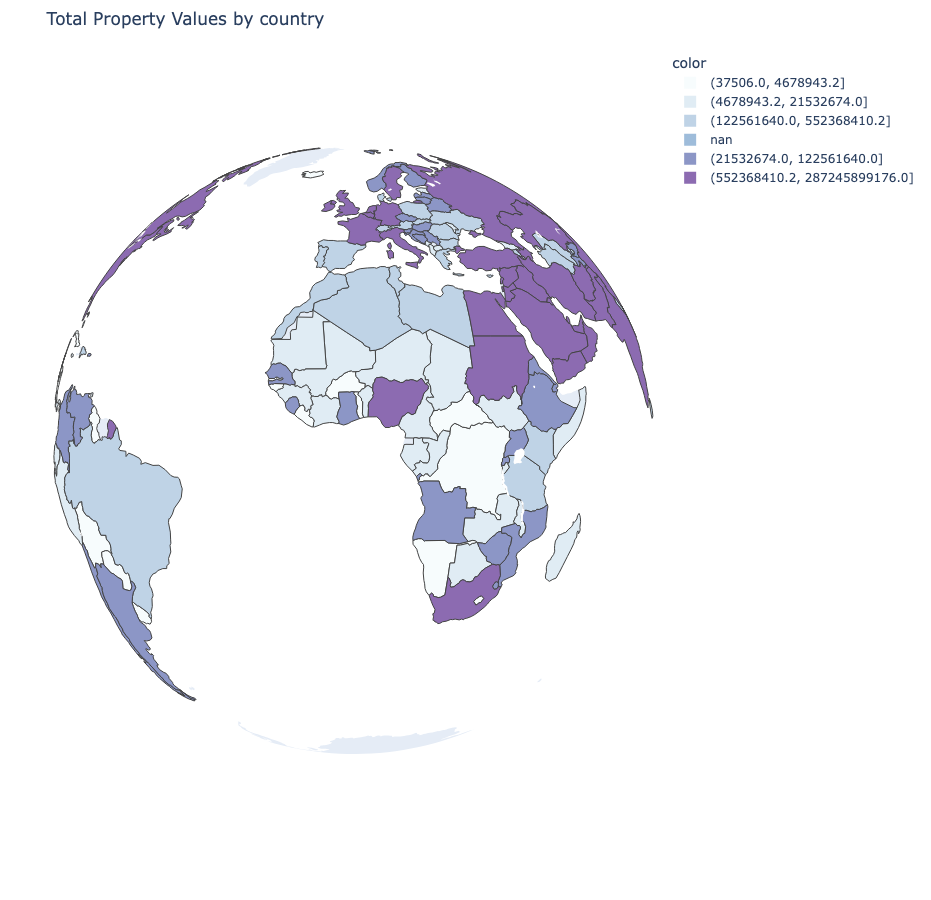

In [29]:
plot_generator("Total Property Values")

Now, view the beautiful visualizations with `interact`!

In [30]:
interact(plot_generator, col=data);

interactive(children=(Dropdown(description='col', options=('Unique Owners', 'Unique Properties', 'Total Proper…

Let's throw in another toggle as a bonus!

In [31]:
display(widgets.interactive(plot_generator, col=widgets.ToggleButtons(options=[
    "Total Property Values", "Total Property Value / GDP", "Mean Property value", "Median Property Value"])));


interactive(children=(ToggleButtons(description='col', options=('Total Property Values', 'Total Property Value…

<!-- BEGIN QUESTION -->

**Question 3.3:** Using the widget that you generate above. Name one country that has both a high total property value invested in Dubai and a high total property value / GDP. What does that potentially imply about income inequality in that country? This is an open-ended question. 

Although the graphs are visually appealing – scrolling back and forward between multiple graphs is tedious, and I, therefore, start by looking at the countries in the top decile both in `'Total Property Values'` and `'Total Property Value / GDP'` with a regular table

In [32]:
upper_decile = data['Total Property Values'].quantile(0.9)
TPV_upper_decile = data[data['Total Property Values'] > upper_decile].reset_index()
TPV_upper_decile = TPV_upper_decile[['Country', 'Total Property Values', 'GDP (current USD, 2018 or latest available - for coverage)', 'Total Property Value / GDP']]

upper_decile = data['Total Property Value / GDP'].quantile(0.9)
TPVGDP_upper_decile = data[data['Total Property Value / GDP'] > upper_decile].reset_index()
TPVGDP_upper_decile = TPVGDP_upper_decile['Country']

merge = TPV_upper_decile.merge(TPVGDP_upper_decile, how='inner',on='Country').set_index('Country')
display(merge)

Total Property Values  \
Country                                       
Kuwait                         3.795782e+09   
Pakistan                       1.063164e+10   
Lebanon                        3.398557e+09   
Syria                          2.976197e+09   
Jordan                         5.197686e+09   
United Arab Emirates           2.872459e+11   

                      GDP (current USD, 2018 or latest available - for coverage)  \
Country                                                                            
Kuwait                                                     1.380000e+11            
Pakistan                                                   3.150000e+11            
Lebanon                                                    5.530000e+10            
Syria                                                      4.040000e+10            
Jordan                                                     4.290000e+10            
United Arab Emirates                                       4.220000e+11            

                      Total Property Value / GDP  
Country                                           
Kuwait                                      2.75  
Pakistan                                    3.38  
Lebanon                                     6.15  
Syria                                       7.37  
Jordan                                     12.11  
United Arab Emirates                       68.04

As the table above shows, six countries appear in the upper decile of both `'Total Property Values'` and `'Total Property Value / GDP'`. Unsurprisingly, one of them is the UAE itself, while the rest are Middle Eastern countries. A likely reason for the countries to be there is a relatively high inequality in respective countries. To be on this list, they must have some really wealthy people who can afford expensive property in Dubai while maintaining a relatively low GDP.

<!-- END QUESTION -->

**Congratulations!!** You are done with the lab. Hopefully you enjoyed producing these geospatial visualizations!

---
## Feedback

**Question 4:** Please fill out this short [feedback form](https://forms.gle/zfy4e7NH8gvcYmB37) to let us know your thoughts about this lab! We really appreciate your opinions and feedback! At the end of the Google form, you should see a codeword. Assign the codeword to the variable `codeword` below. 

In [33]:
codeword = 'Dubai'

In [34]:
grader.check("q4")

q4 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [35]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

/Users/johanoelgaard/anaconda3/lib/python3.11/site-packages/nbconvert/utils/pandoc.py:51: RuntimeWarning:

You are using an unsupported version of pandoc (3.1.11.1).
Your version must be at least (1.12.1) but less than (3.0.0).
Refer to https://pandoc.org/installing.html.
Continuing with doubts...

/Users/johanoelgaard/anaconda3/lib/python3.11/site-packages/nbconvert/filters/datatypefilter.py:41: UserWarning:

Your element with mimetype(s) dict_keys(['application/vnd.plotly.v1+json']) is not able to be represented.

/Users/johanoelgaard/anaconda3/lib/python3.11/site-packages/nbconvert/filters/datatypefilter.py:41: UserWarning:

Your element with mimetype(s) dict_keys(['application/vnd.plotly.v1+json']) is not able to be represented.



Running your submission against local test cases...


Your submission received the following results when run against available test cases:

    q1_1 results: All test cases passed!

    q1_2 results: All test cases passed!

    q1_3 results: All test cases passed!

    q1_4 results: All test cases passed!

    q2_1 results: All test cases passed!

    q3_1 results: All test cases passed!

    q4 results: All test cases passed!
